In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import os
import fnmatch

import numpy as np

from scipy.stats import ttest_ind

import itertools as it
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = "I:\\Honours-Project\\data\\Sherry Healthy Donors\\Heparin counts TSC surface levels\\20180515 HD0006\\Exported data\\export_TSC_FITC - IgG1_003.csv"

In [4]:
root_path = "I:\\Honours-Project\\data\\Sherry Healthy Donors\\Heparin counts TSC surface levels\\"
citrate_path = "I:\\Honours-Project\\data\\Sherry Healthy Donors\\TSC counts TSC surface levels\\"

In [5]:
donors = []
files = set()
count = 0

for donor in os.listdir(citrate_path):
    donors.append(donor)
    
    donor_path = f'{citrate_path}\\{donor}\\new data'
    
    for file in os.listdir(donor_path):
        if fnmatch.fnmatch(file, '*.csv'):
            files.add(file)
            count += 1
            
print(count)
print(len(files))
print(files)

36
12
{'export_PE-CD41.csv', 'export_RCA-TEXAS RED.csv', 'export_PE-IgG1 Iso.csv', 'export_1G5-AF488-APC-ADAM10.csv', 'export_FITC Iso.csv', 'export_PE-IgG Iso.csv', 'export_APC Iso.csv', 'export_FITC-AK2.csv', 'export_Unstained.csv', 'export_PE-CD9.csv', 'export_FITC-RCA.csv', 'export_AF488 Control.csv'}


In [6]:
surface_level_files = {
    'APC ADAM10':'export_PRP_AF488 1G5 + APC ADAM10.csv', 
    'AF488 1G5':'export_PRP_AF488 1G5 + APC ADAM10.csv', 
    'DY594 RCA':'export_PRP_Dy594 RCA1.csv', 
    'PE IgG':'export_PRP_PE IgG.csv', 
    'FITC IgG1':'export_PRP_FITC IgG1.csv', 
    'PE CD9':'export_PRP_PE CD9.csv', 
    'AF488 IgG':'export_PRP_AF488 IgG.csv', 
    'PE IgG1':'export_PRP_PE IgG1.csv', 
    'PE CD41':'export_PRP_PE CD41.csv', 
    'APC IgG2b':'export_PRP_APC IgG2b.csv', 
    'FITC RCA1':'export_PRP_FITC RCA1.csv', 
    'FITC AK2':'export_PRP_FITC AK2.csv', 
    'Unstained':'export_PRP_Unstained.csv'
}

citrate_level_files = {
    'PE CD9':'export_PE-CD9.csv', 
    'FITC IgG1':'export_FITC Iso.csv', 
    'FITC RCA1':'export_FITC-RCA.csv', 
    'PE CD41':'export_PE-CD41.csv', 
    'Unstained':'export_Unstained.csv', 
    'FITC AK2':'export_FITC-AK2.csv', 
    'APC ADAM10':'export_1G5-AF488-APC-ADAM10.csv', 
    'AF488 1G5':'export_1G5-AF488-APC-ADAM10.csv', 
    'PE IgG1':'export_PE-IgG1 Iso.csv', 
    'APC IgG2b':'export_APC Iso.csv', 
    'DY594 RCA':'export_RCA-TEXAS RED.csv', 
    'PE IgG':'export_PE-IgG Iso.csv', 
    'AF488 IgG':'export_AF488 Control.csv'
}

measured_bands = {'APC ADAM10':['APC-A'], 
    'AF488 1G5':['FITC-A','Alexa Fluor 488-A'],
    'DY594 RCA':['PE-Texas Red-A'], 
    'PE IgG':['PE-A'], 
    'FITC IgG1':['FITC-A','Alexa Fluor 488-A'], 
    'PE CD9':['PE-A'], 
    'AF488 IgG':['FITC-A','Alexa Fluor 488-A'], 
    'PE IgG1':['PE-A'], 
    'PE CD41':['PE-A'], 
    'APC IgG2b':['APC-A'], 
    'FITC RCA1':['FITC-A','Alexa Fluor 488-A'], 
    'FITC AK2':['FITC-A','Alexa Fluor 488-A'],
    'Unstained':['PE-Texas Red-A','APC-A','FITC-A','PE-A'],
}

measured_bands_height = {'APC ADAM10':['APC-H'], 
    'AF488 1G5':['FITC-H','Alexa Fluor 488-H'],
    'DY594 RCA':['PE-Texas Red-H'], 
    'PE IgG':['PE-H'], 
    'FITC IgG1':['FITC-H','Alexa Fluor 488-H'], 
    'PE CD9':['PE-H'], 
    'AF488 IgG':['FITC-H','Alexa Fluor 488-H'], 
    'PE IgG1':['PE-H'], 
    'PE CD41':['PE-H'], 
    'APC IgG2b':['APC-H'], 
    'FITC RCA1':['FITC-H','Alexa Fluor 488-H'], 
    'FITC AK2':['FITC-H','Alexa Fluor 488-H'],
    'Unstained':['PE-Texas Red-H','APC-H','FITC-H','PE-H'],
}

measured_surface_markers = {'ADAM10':'APC ADAM10',
                            '1G5':'AF488 1G5',
                            'AK2':'FITC AK2',
                            'CD9':'PE CD9',
                            'CD41':'PE CD41',
                            'RCA - FITC':'FITC RCA1',
                            'RCA - Texas red':'DY594 RCA'}

baseline_surface_markers = {'ADAM10':'APC IgG2b',
                            '1G5':'AF488 1G5',
                            'AK2':'FITC IgG1',
                            'CD9':'PE IgG1',
                            'CD41':'PE IgG1',
                            'RCA - FITC':'FITC IgG1',
                            'RCA - Texas red':'Unstained'}

In [7]:
for donor in os.listdir(root_path):
    sm_values = {}

    for surface_marker in measured_surface_markers.keys():
        file = surface_level_files[measured_surface_markers[surface_marker]]
        
        sm_values[surface_marker] = file
        
        donor_path = f'{root_path}\\{donor}\\new data\\{file}'
        
        db = pd.DataFrame.from_csv(donor_path)
        
        means = db.mean()
    
        

C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  # This is added back by InteractiveShellApp.init_path()


## T-Score

In [8]:
def t_score(donor_a, donor_b, marker):
    file = surface_level_files[measured_surface_markers[marker]]
    
    donor_a_path = f'{root_path}\\{donor_a}\\new data\\{file}'
    donor_b_path = f'{root_path}\\{donor_b}\\new data\\{file}'
    
    fluorophore = measured_bands[measured_surface_markers[marker]]
    
    db_a = pd.DataFrame.from_csv(donor_a_path)
    db_b = pd.DataFrame.from_csv(donor_b_path)
        
    f_a = None
    f_b = None
    
    
    if len(fluorophore) > 1:
        for f in fluorophore:
            #print(f)
            if f in list(db_a):
                f_a = db_a[f]
            if f in list(db_b):
                f_b = db_b[f]
                
            if f_a is not None and f_b is not None:
                break
    else:
        f_a = db_a[fluorophore]
        f_b = db_b[fluorophore]
        
    return  ttest_ind(f_a,f_b, equal_var=False)

In [9]:
t_test_table_stat = {}
t_test_table_p_val = {}

for marker in measured_surface_markers.keys():
    #print(marker)
    stat = []
    p_val = []
    
    for pair in it.combinations(os.listdir(root_path), 2):
        #print(pair)
        s, p = t_score(*pair, marker)
        stat.append(s)
        p_val.append(float(p))
        
    t_test_table_stat[marker] = stat
    t_test_table_p_val[marker] = p_val
    
df = pd.DataFrame.from_dict(t_test_table_p_val,orient='index',columns=list(it.combinations(os.listdir(root_path), 2)))

df.head()

C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  if __name__ == '__main__':
C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  # Remove the CWD from sys.path while we load stuff.


,"(20180515 HD0006, 20180601 HD0026)","(20180515 HD0006, 20180605 HD0039)","(20180515 HD0006, 20180606 HD0042)","(20180601 HD0026, 20180605 HD0039)","(20180601 HD0026, 20180606 HD0042)","(20180605 HD0039, 20180606 HD0042)"
ADAM10,0.000000e+00,1.481632e-37,2.559329e-27,0.000000e+00,0.000000e+00,8.488468e-04
1G5,1.584543e-235,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.294894e-171
AK2,0.000000e+00,6.881741e-150,2.609115e-32,1.067634e-138,0.000000e+00,0.000000e+00
CD9,6.216365e-09,5.358893e-34,1.625983e-07,1.224925e-51,3.060252e-02,5.592888e-75
CD41,7.824801e-02,7.562979e-02,1.966970e-95,8.800029e-01,2.239781e-137,6.199423e-126


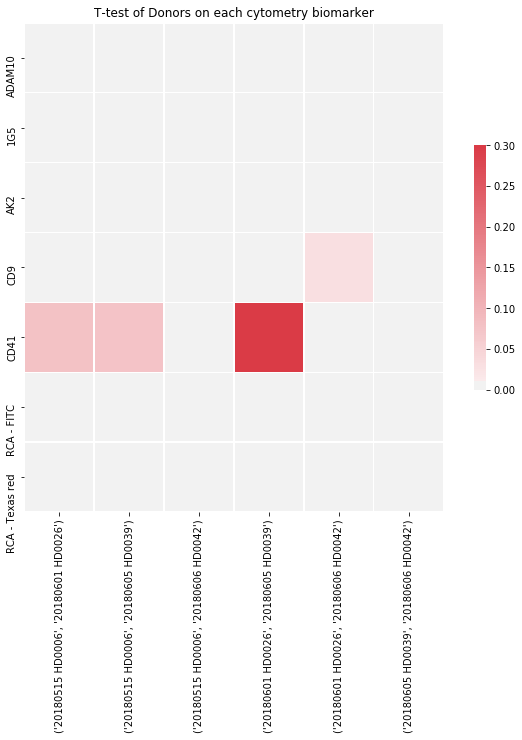

In [10]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('T-test of Donors on each cytometry biomarker')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
donors = []
files = set()
count = 0

for donor in os.listdir(root_path):
    donors.append(donor)
    
    donor_path = f'{root_path}\\{donor}\\new data'
    
    for file in os.listdir(donor_path):
        if fnmatch.fnmatch(file, '*.csv'):
            files.add(file)
            count += 1
            
print(count)
print(len(files))
print(files)

48
12
{'export_PRP_Dy594 RCA1.csv', 'export_PRP_PE IgG1.csv', 'export_PRP_AF488 1G5 + APC ADAM10.csv', 'export_PRP_FITC RCA1.csv', 'export_PRP_APC IgG2b.csv', 'export_PRP_FITC AK2.csv', 'export_PRP_FITC IgG1.csv', 'export_PRP_PE CD9.csv', 'export_PRP_PE CD41.csv', 'export_PRP_AF488 IgG.csv', 'export_PRP_PE IgG.csv', 'export_PRP_Unstained.csv'}


In [12]:
donors_matches = []

for donor in os.listdir(root_path):
    donors.append(donor)
    
    donor_matches = []
    
    donor_path = f'{root_path}\\{donor}\\new data'
    
    for file in files:
        donor_matches.append(file in os.listdir(donor_path))
    
    donors_matches.append(donor_matches)

donor_measures = pd.DataFrame.from_records(donors_matches, columns=files)          

In [13]:
donor_measures

,export_PRP_Dy594 RCA1.csv,export_PRP_PE IgG1.csv,export_PRP_AF488 1G5 + APC ADAM10.csv,export_PRP_FITC RCA1.csv,export_PRP_APC IgG2b.csv,export_PRP_FITC AK2.csv,export_PRP_FITC IgG1.csv,export_PRP_PE CD9.csv,export_PRP_PE CD41.csv,export_PRP_AF488 IgG.csv,export_PRP_PE IgG.csv,export_PRP_Unstained.csv
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True


In [14]:
biomarkers = pd.read_csv(path, header=225)

FileNotFoundError: File b'I:\\Honours-Project\\data\\Sherry Healthy Donors\\Heparin counts TSC surface levels\\20180515 HD0006\\Exported data\\export_TSC_FITC - IgG1_003.csv' does not exist

In [ ]:
biomarkers.head()

In [ ]:
biomarkers.shape

In [16]:
#https://stackoverflow.com/questions/11882393/matplotlib-disregard-outliers-when-plotting
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

## Box Plots

In [17]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 20)

Populating the interactive namespace from numpy and matplotlib


C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


1G5
20180601 HD0026
------
FITC-A
Alexa Fluor 488-A
------
AK2
20180601 HD0026
------
FITC-A
Alexa Fluor 488-A
------
RCA - FITC
20180601 HD0026
------
FITC-A
Alexa Fluor 488-A
------


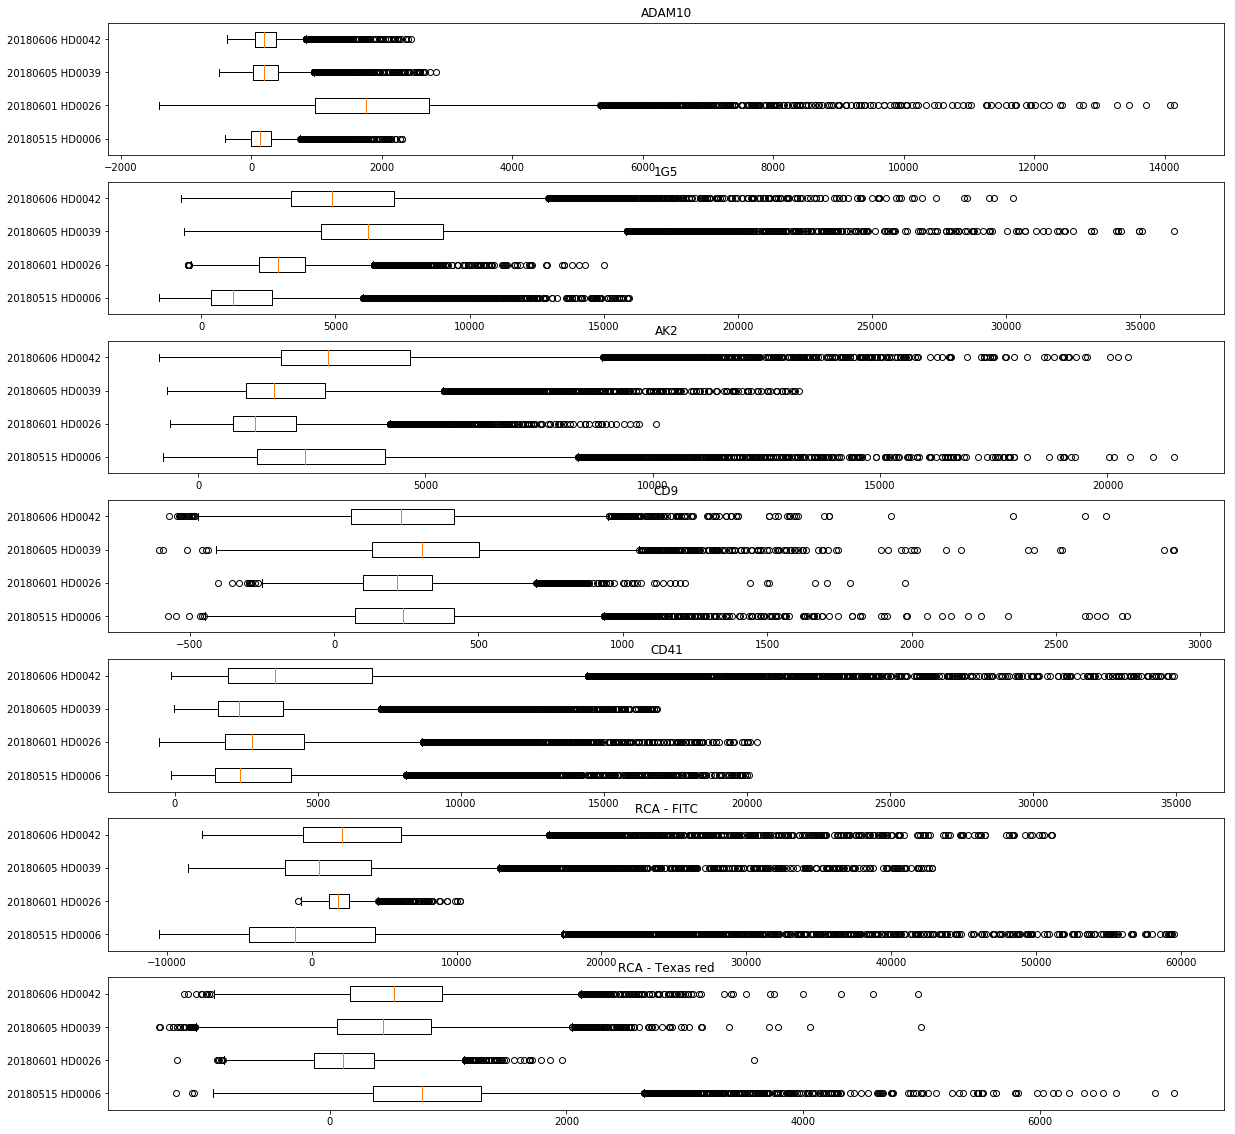

In [49]:
'''
    path - Heparin/Citrate
    band - Area/Height
    surface marker - marked/base
'''

def show_box_plot(path,band,file_name,s_marker,log_scale=False):
    num_markers = len(s_marker)
    num_donors = len(os.listdir(path))
    fig,ax = plt.subplots(num_markers,1)

    for i in range(num_markers):
        data = []
        for j in range(num_donors):
            marker = list(s_marker.keys())[i]
            donor = os.listdir(path)[j]

            file = file_name[s_marker[marker]]

            donor_a_path = f'{path}\\{donor}\\new data\\{file}'

            fluorophore = band[s_marker[marker]]

            db_a = pd.DataFrame.from_csv(donor_a_path)

            f_a = None

            if len(fluorophore) > 1:
                for f in fluorophore:
                    if f in list(db_a):
                        if fluorophore[0] is not f:
                            print(marker)
                            print(donor)
                            print('------')
                            print(fluorophore[0])
                            print(f)
                            print('------')
                        f_a = db_a[f]
                        break

            else:
                f_a = db_a[fluorophore[0]]

            if log_scale:
                f_a = f_a[f_a > 0]
            data.append(f_a[~is_outlier(f_a,10)])
        ax[i].boxplot(data,vert=False,labels=os.listdir(path))

        ax[i].set_title(marker)
        
        if log_scale:
            ax[i].set_xscale('log')
show_box_plot(root_path,measured_bands,surface_level_files,measured_surface_markers)

C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


1G5
20180601 HD0026
------
FITC-H
Alexa Fluor 488-H
------
AK2
20180601 HD0026
------
FITC-H
Alexa Fluor 488-H
------
RCA - FITC
20180601 HD0026
------
FITC-H
Alexa Fluor 488-H
------


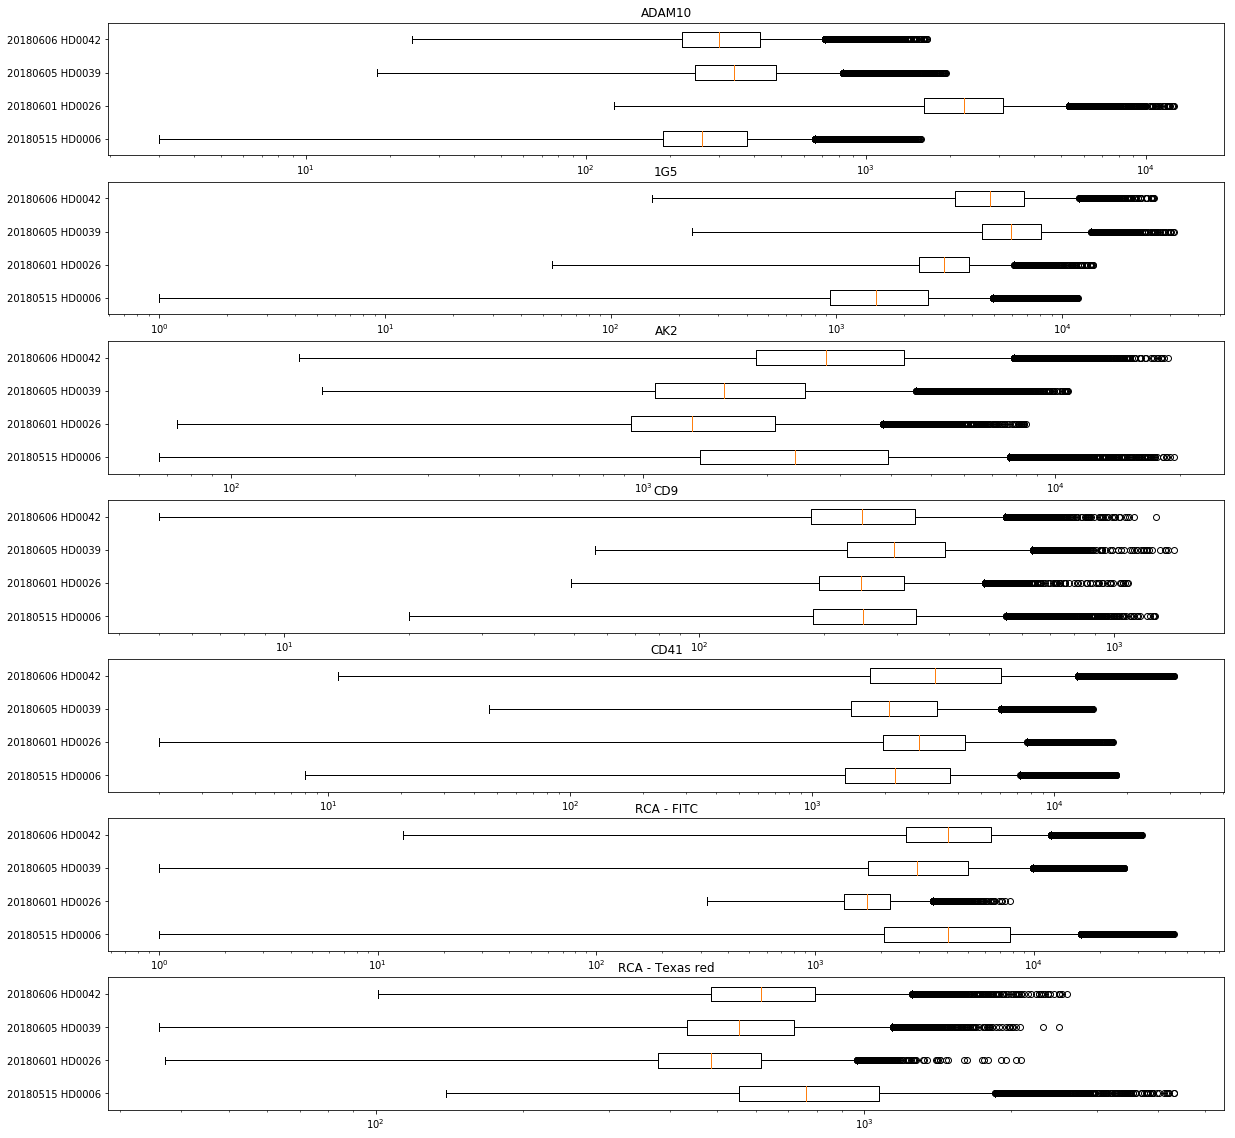

In [50]:
show_box_plot(root_path,measured_bands_height,surface_level_files,measured_surface_markers,True)

## Histograms

C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


1G5
20180601 HD0026
------
FITC-A
Alexa Fluor 488-A
------
AK2
20180601 HD0026
------
FITC-A
Alexa Fluor 488-A
------
RCA - FITC
20180601 HD0026
------
FITC-A
Alexa Fluor 488-A
------


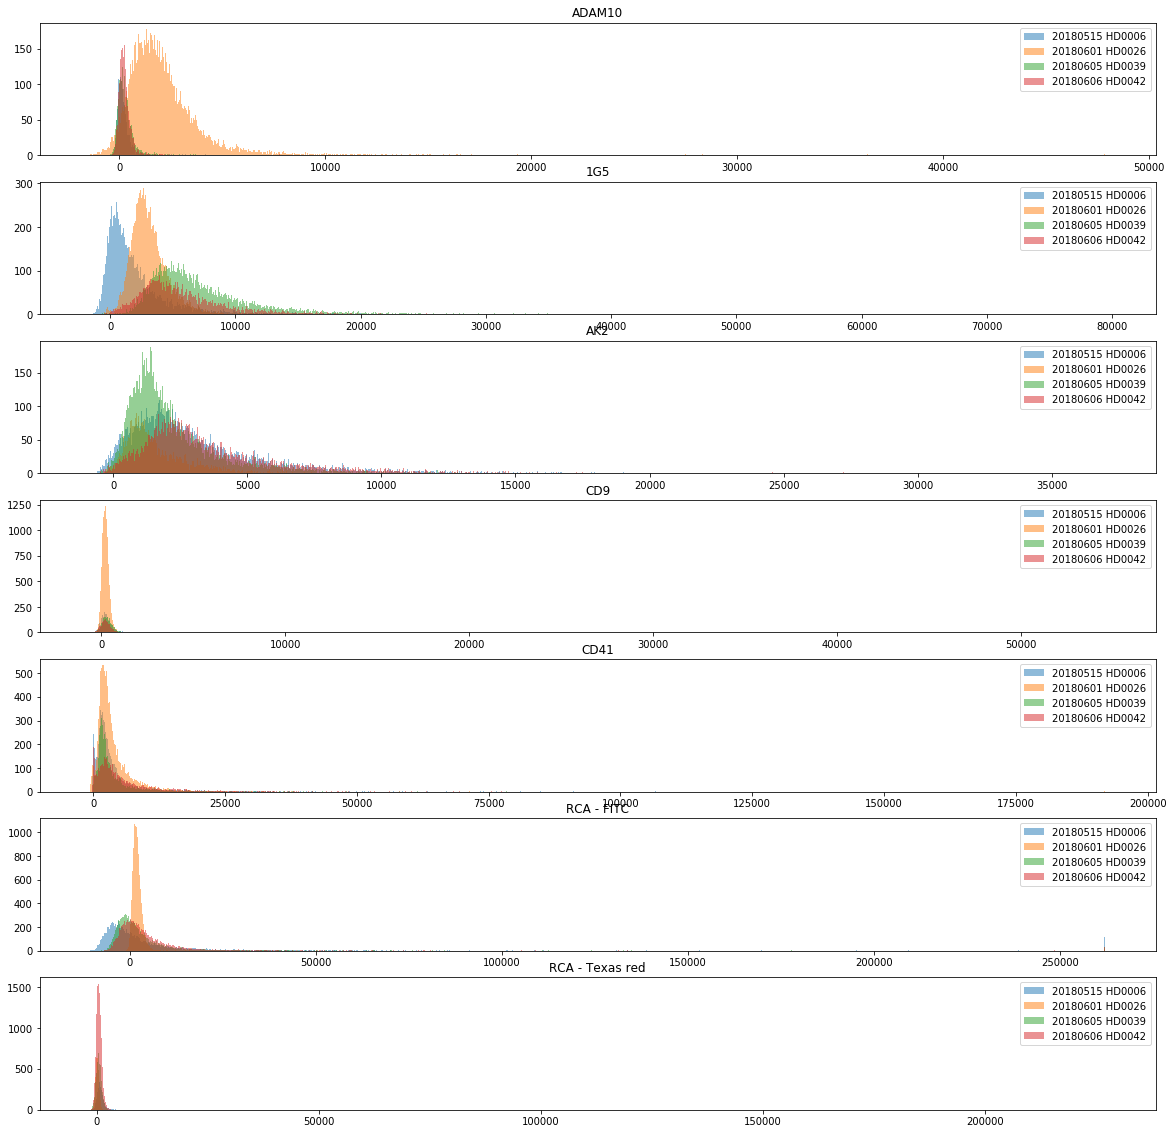

In [47]:
'''
    path - Heparin/Citrate
    band - Area/Height
    surface marker - marked/base
'''

def show_hist(path,band,file_name,s_marker,log_scale=False):
    num_markers = len(s_marker)
    num_donors = len(os.listdir(path))
    fig,ax = plt.subplots(num_markers,1)

    for i in range(num_markers):
        data = []
        for j in range(num_donors):
            marker = list(s_marker.keys())[i]
            donor = os.listdir(path)[j]

            file = file_name[s_marker[marker]]

            donor_a_path = f'{path}\\{donor}\\new data\\{file}'

            fluorophore = band[s_marker[marker]]

            db_a = pd.DataFrame.from_csv(donor_a_path)

            f_a = None

            if len(fluorophore) > 1:
                for f in fluorophore:
                    if f in list(db_a):
                        if fluorophore[0] is not f:
                            print(marker)
                            print(donor)
                            print('------')
                            print(fluorophore[0])
                            print(f)
                            print('------')
                        f_a = db_a[f]
                        break

            else:
                f_a = db_a[fluorophore[0]]

            #f_a[f_a<=0] = 1
            #log_f = np.log(f_a)
            #log_f[log_f<0] = 0

            #print(type(f_a))
            #print(f_a.describe())
            data.append(f_a)
            #ax[j].boxplot(f_a)
            
            if log_scale:
                f_a = f_a[f_a > 0]

            bins = np.linspace(np.min(f_a), np.max(f_a), 1000)
            
            if log_scale:
                bins = np.logspace(np.log10(np.min(f_a)),np.log10(np.max(f_a)),1000)
            #print(bins)
            ax[i].hist(f_a,bins,alpha=0.5,label=donor)

        if log_scale:
            ax[i].set_xscale('log')

        ax[i].set_title(marker)
        ax[i].legend(loc='upper right')
show_hist(root_path,measured_bands,surface_level_files,measured_surface_markers)

## Data (baseline)

In [ ]:
show_hist(root_path,measured_bands,baseline_surface_markers)

## Height Plots

In [ ]:
num_markers = len(measured_surface_markers)
num_donors = len(os.listdir(root_path))

fig,ax = plt.subplots(num_markers,1)

for i in range(num_markers):
    data = []
    for j in range(num_donors):
        marker = list(measured_surface_markers.keys())[i]
        donor = os.listdir(root_path)[j]
        
        file = surface_level_files[measured_surface_markers[marker]]
    
        donor_a_path = f'{root_path}\\{donor}\\new data\\{file}'

        fluorophore = measured_bands_height[measured_surface_markers[marker]]

        db_a = pd.DataFrame.from_csv(donor_a_path)

        f_a = None

        if len(fluorophore) > 1:
            for f in fluorophore:
                if f in list(db_a):
                    if fluorophore[0] is not f:
                        print(marker)
                        print(donor)
                        print('------')
                        print(fluorophore[0])
                        print(f)
                        print('------')
                    f_a = db_a[f]
                    break
                    
        else:
            f_a = db_a[fluorophore[0]]
        
        #print(type(f_a))
        #print(f_a.describe())
        data.append(f_a)
        #ax[j].boxplot(f_a)
    ax[i].boxplot(data,labels=os.listdir(root_path),vert=False)
    ax[i].set_title(marker)

C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


1G5
20180601 HD0026
------
FITC-H
Alexa Fluor 488-H
------
AK2
20180601 HD0026
------
FITC-H
Alexa Fluor 488-H
------
RCA - FITC
20180601 HD0026
------
FITC-H
Alexa Fluor 488-H
------


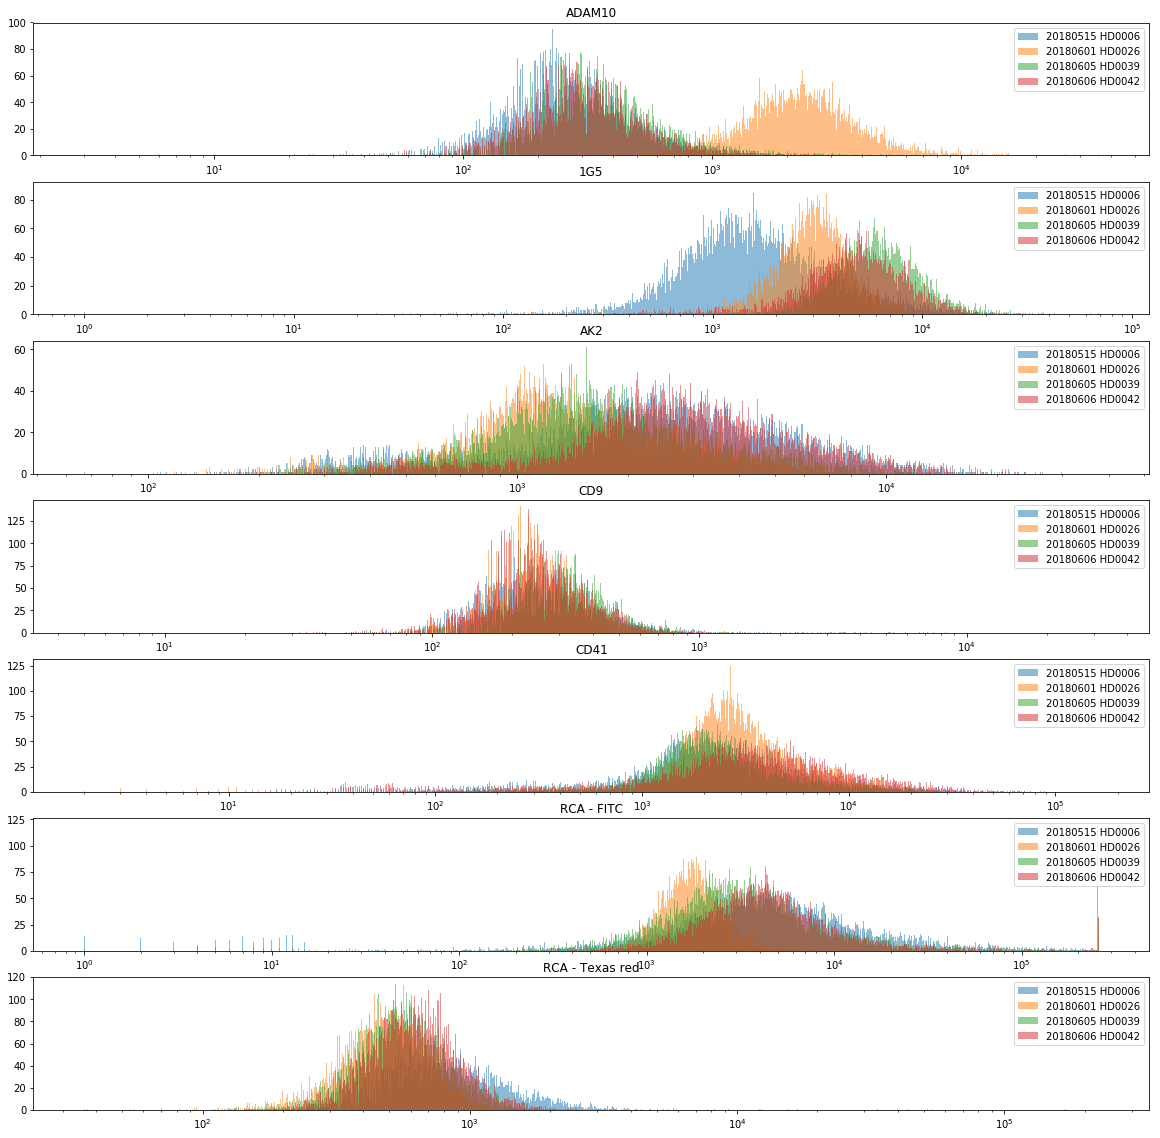

In [48]:
show_hist(root_path,measured_bands_height,surface_level_files,measured_surface_markers,True)

In [76]:
show_hist(root_path,measured_bands_height,surfabase,line_surface_markers)

NameError: name 'surfabaseline_surface_markers' is not defined

## Citrate Test

C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


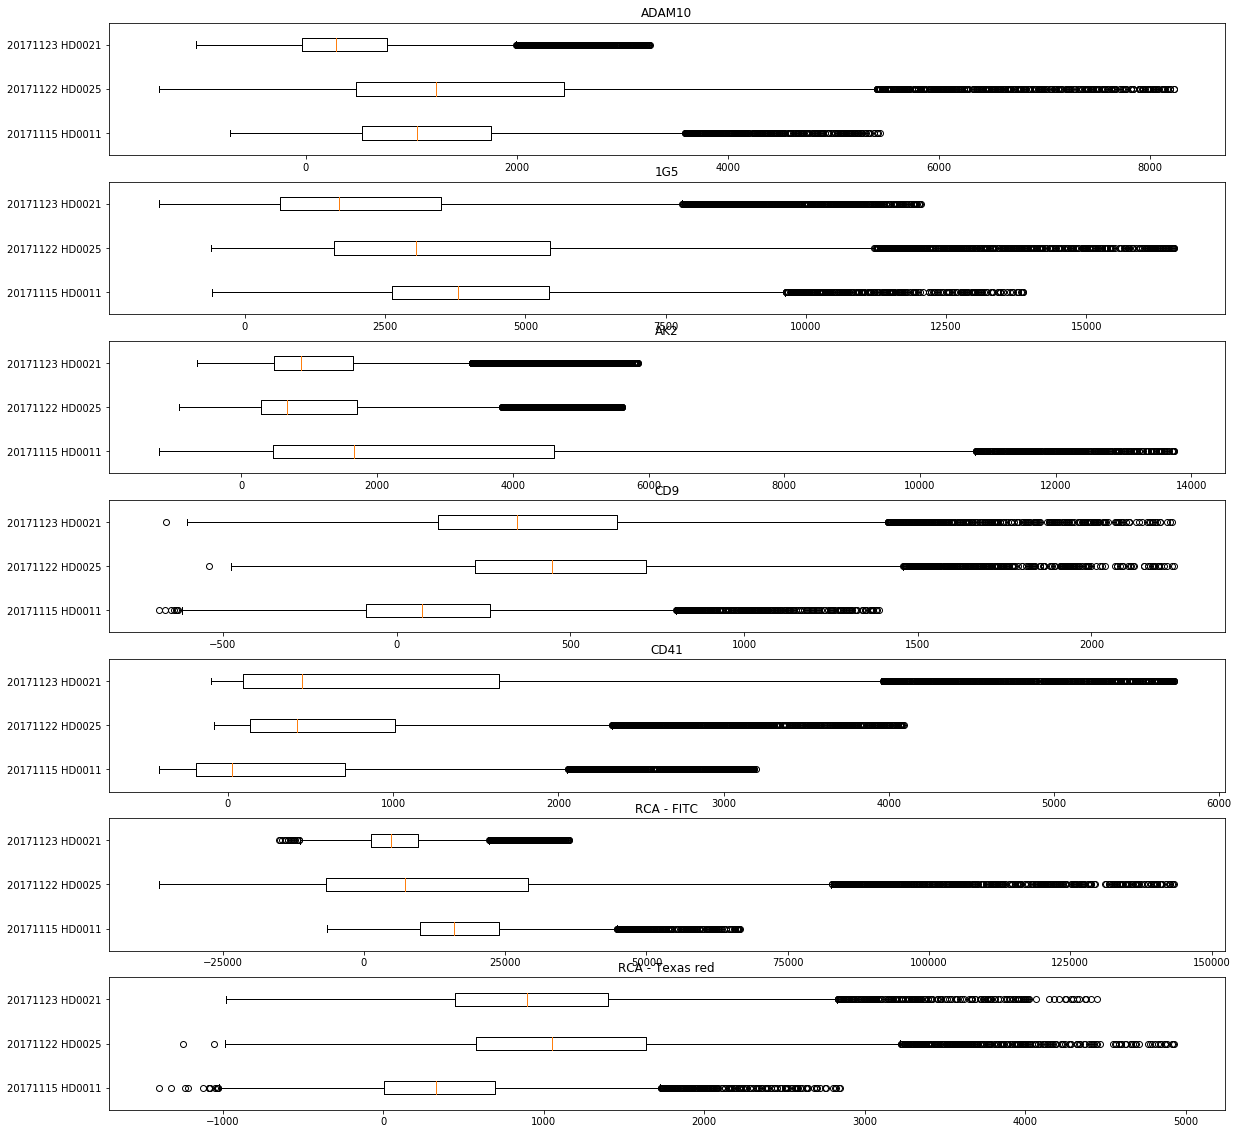

In [58]:
show_box_plot(citrate_path,measured_bands,citrate_level_files,measured_surface_markers)

C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


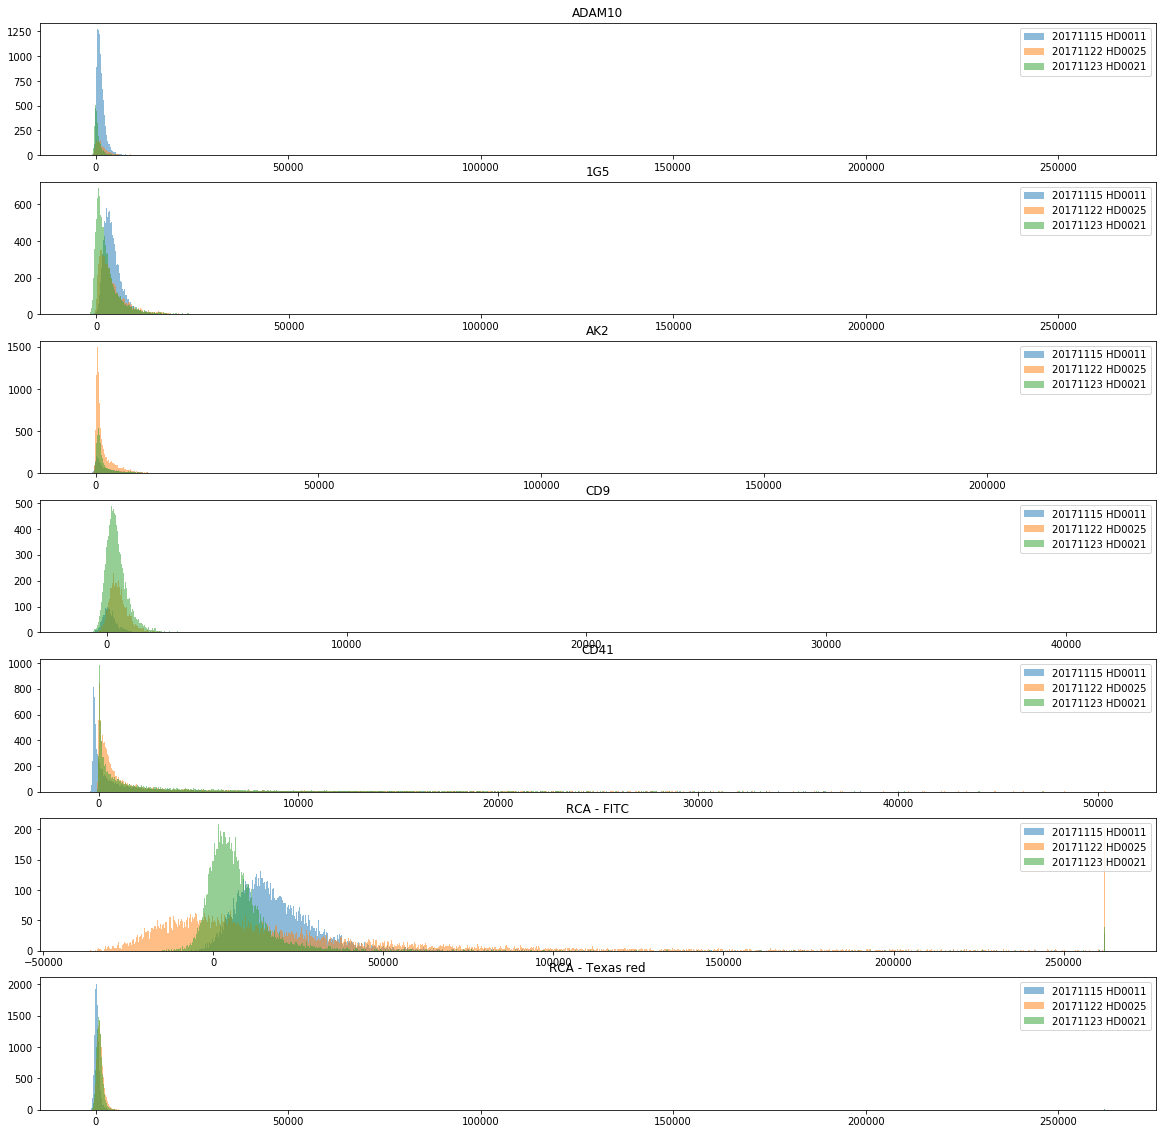

In [53]:
show_hist(citrate_path,measured_bands,citrate_level_files,measured_surface_markers)

## Combined Heparin and Citrate Data

C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


1G5
20180601 HD0026
------
FITC-H
Alexa Fluor 488-H
------
AK2
20180601 HD0026
------
FITC-H
Alexa Fluor 488-H
------
RCA - FITC
20180601 HD0026
------
FITC-H
Alexa Fluor 488-H
------


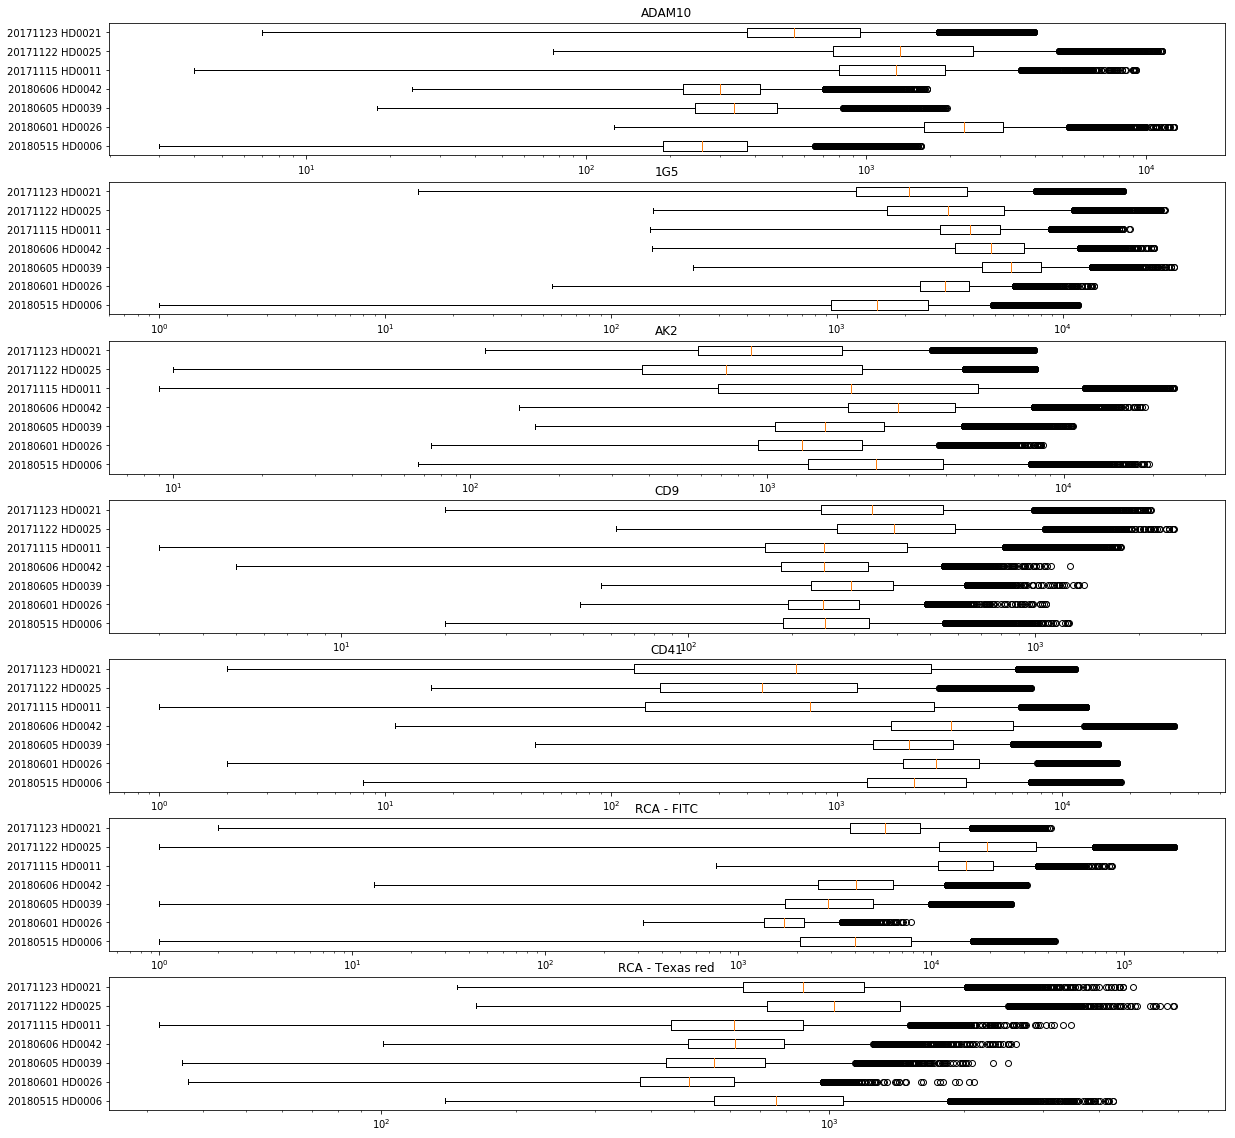

In [52]:
'''
    path - Heparin/Citrate
    band - Area/Height
    surface marker - marked/base
'''

def show_box_plot_combined(band,s_marker):
    num_markers = len(s_marker)
    fig,ax = plt.subplots(num_markers,1)

    file_name = {root_path:surface_level_files,citrate_path:citrate_level_files}
    
    labels = os.listdir(root_path) + os.listdir(citrate_path)
    
    for i in range(num_markers):
        data = []
        for path in [root_path, citrate_path]:

            for j in range(len(os.listdir(path))):
                marker = list(s_marker.keys())[i]
                donor = os.listdir(path)[j]

                file = file_name[path][s_marker[marker]]

                donor_a_path = f'{path}\\{donor}\\new data\\{file}'

                fluorophore = band[s_marker[marker]]

                db_a = pd.DataFrame.from_csv(donor_a_path)

                f_a = None

                if len(fluorophore) > 1:
                    for f in fluorophore:
                        if f in list(db_a):
                            if fluorophore[0] is not f:
                                print(marker)
                                print(donor)
                                print('------')
                                print(fluorophore[0])
                                print(f)
                                print('------')
                            f_a = db_a[f]
                            break

                else:
                    f_a = db_a[fluorophore[0]]

                f_a = f_a[f_a > 0]
                
                data.append(f_a[~is_outlier(f_a,10)])
                
        ax[i].boxplot(data,vert=False,labels=labels)

        ax[i].set_title(marker)
        ax[i].set_xscale('log')
show_box_plot_combined(measured_bands_height,measured_surface_markers)

C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


1G5
20180601 HD0026
------
FITC-H
Alexa Fluor 488-H
------
AK2
20180601 HD0026
------
FITC-H
Alexa Fluor 488-H
------
RCA - FITC
20180601 HD0026
------
FITC-H
Alexa Fluor 488-H
------


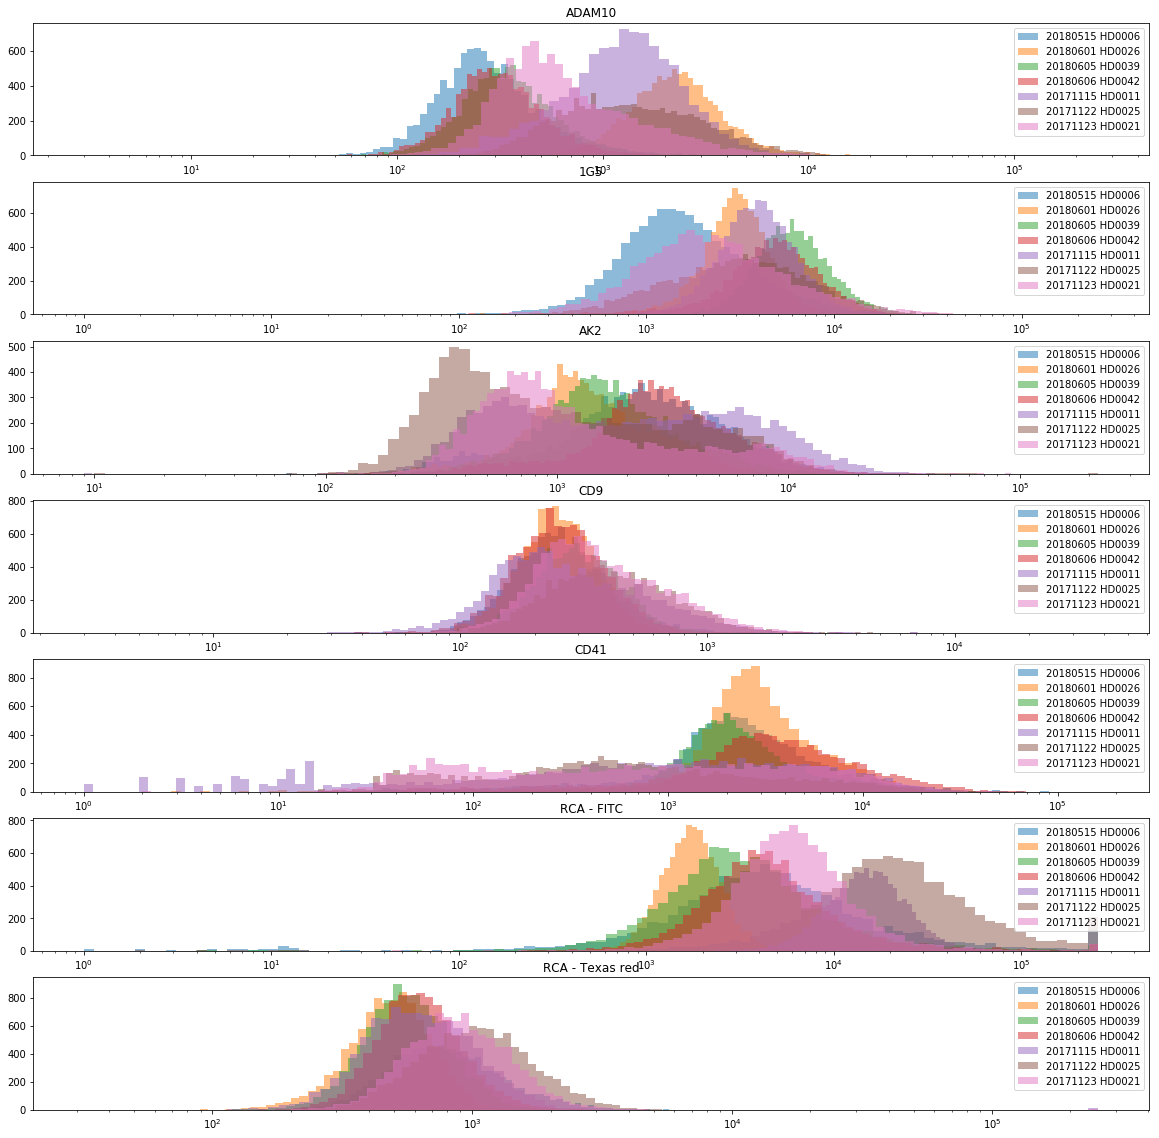

In [51]:
'''
    path - Heparin/Citrate
    band - Area/Height
    surface marker - marked/base
'''

def show_hist_combined(band,s_marker):
    num_markers = len(s_marker)
    fig,ax = plt.subplots(num_markers,1)
    file_name = {root_path:surface_level_files,citrate_path:citrate_level_files}
    
    labels = os.listdir(root_path) + os.listdir(citrate_path)
    
    for i in range(num_markers):
        data = []
        for path in [root_path, citrate_path]:
            for j in range(len(os.listdir(path))):
                marker = list(s_marker.keys())[i]
                donor = os.listdir(path)[j]

                file = file_name[path][s_marker[marker]]

                donor_a_path = f'{path}\\{donor}\\new data\\{file}'

                fluorophore = band[s_marker[marker]]

                db_a = pd.DataFrame.from_csv(donor_a_path)

                f_a = None

                if len(fluorophore) > 1:
                    for f in fluorophore:
                        if f in list(db_a):
                            if fluorophore[0] is not f:
                                print(marker)
                                print(donor)
                                print('------')
                                print(fluorophore[0])
                                print(f)
                                print('------')
                            f_a = db_a[f]
                            break

                else:
                    f_a = db_a[fluorophore[0]]

                #f_a[f_a<=0] = 1
                #log_f = np.log(f_a)
                #log_f[log_f<0] = 0

                #print(type(f_a))
                #print(f_a.describe())
                data.append(f_a)
                #ax[j].boxplot(f_a)

                f_a = f_a[f_a > 0]
                
                bins = numpy.linspace(np.min(f_a), np.max(f_a), 1000)
                bins = np.logspace(np.log10(np.min(f_a)),np.log10(np.max(f_a)),100)
                #print(bins)
                ax[i].hist(f_a,bins,alpha=0.5,label=donor)

        ax[i].set_xscale('log')

        ax[i].set_title(marker)
        ax[i].legend(loc='upper right')
show_hist_combined(measured_bands_height,measured_surface_markers)

## Two Test Donor Results

In [42]:
two_test = "I:\\Honours-Project\\data\\Sherry Healthy Donors\\20180606 HD0042 TSC PRP"
#x20_path = "I:\\Honours-Project\\data\\Sherry Healthy Donors\\20180606 HD0042 TSC PRP\\X-20"

C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


1G5
LSRII
------
FITC-A
Alexa Fluor 488-A
------
AK2
LSRII
------
FITC-A
Alexa Fluor 488-A
------
RCA - FITC
LSRII
------
FITC-A
Alexa Fluor 488-A
------


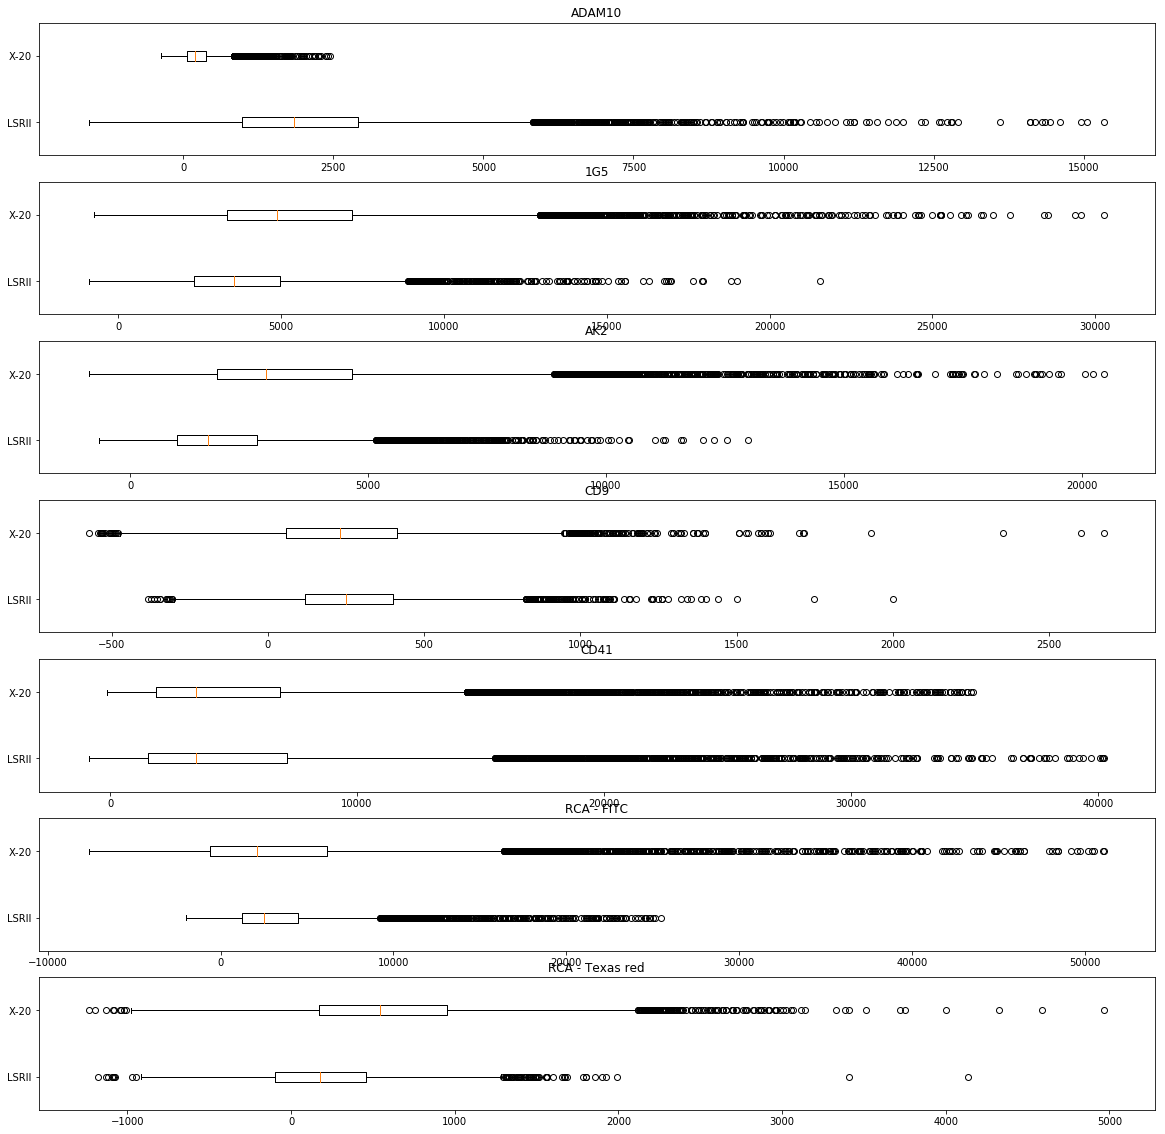

In [77]:
show_box_plot(two_test,measured_bands,surface_level_files,measured_surface_markers)

C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


1G5
LSRII
------
FITC-A
Alexa Fluor 488-A
------
AK2
LSRII
------
FITC-A
Alexa Fluor 488-A
------
RCA - FITC
LSRII
------
FITC-A
Alexa Fluor 488-A
------


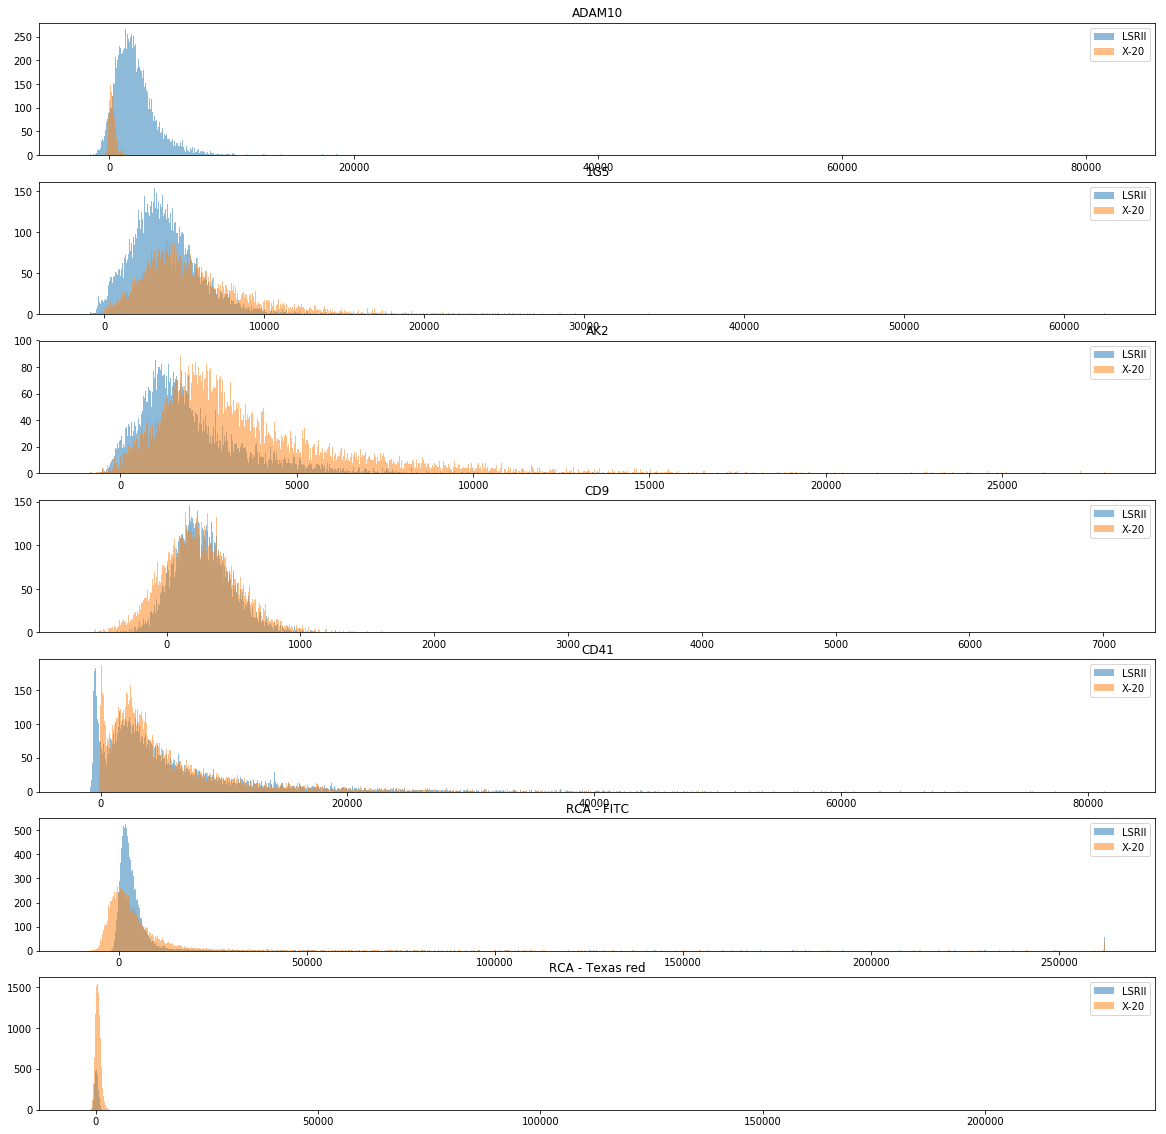

In [30]:
show_hist(two_test,measured_bands,surface_level_files,measured_surface_markers)

C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


1G5
LSRII
------
FITC-H
Alexa Fluor 488-H
------
AK2
LSRII
------
FITC-H
Alexa Fluor 488-H
------
RCA - FITC
LSRII
------
FITC-H
Alexa Fluor 488-H
------


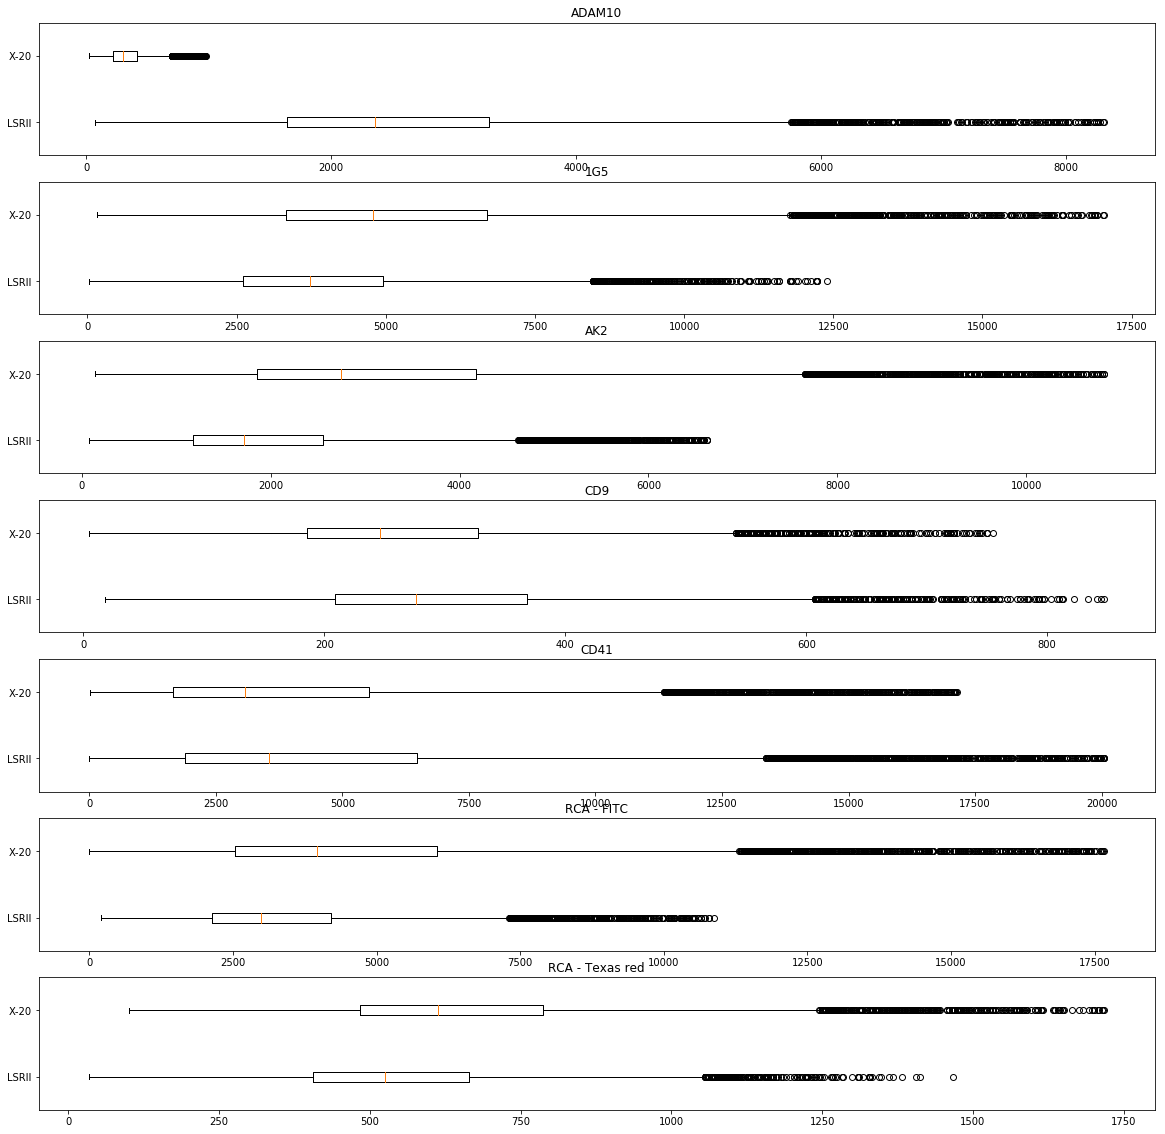

In [59]:
show_box_plot(two_test,measured_bands_height,surface_level_files,measured_surface_markers)

C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


1G5
LSRII
------
FITC-H
Alexa Fluor 488-H
------
AK2
LSRII
------
FITC-H
Alexa Fluor 488-H
------


C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log10
C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\numpy\core\function_base.py:133: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\numpy\core\function_base.py:142: RuntimeWarning: invalid value encountered in add
  y += start
C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\numpy\lib\histograms.py:333: RuntimeWarning: invalid value encountered in greater
  if np.any(bin_edges[:-1] > bin_edges[1:]):


RCA - FITC
LSRII
------
FITC-H
Alexa Fluor 488-H
------


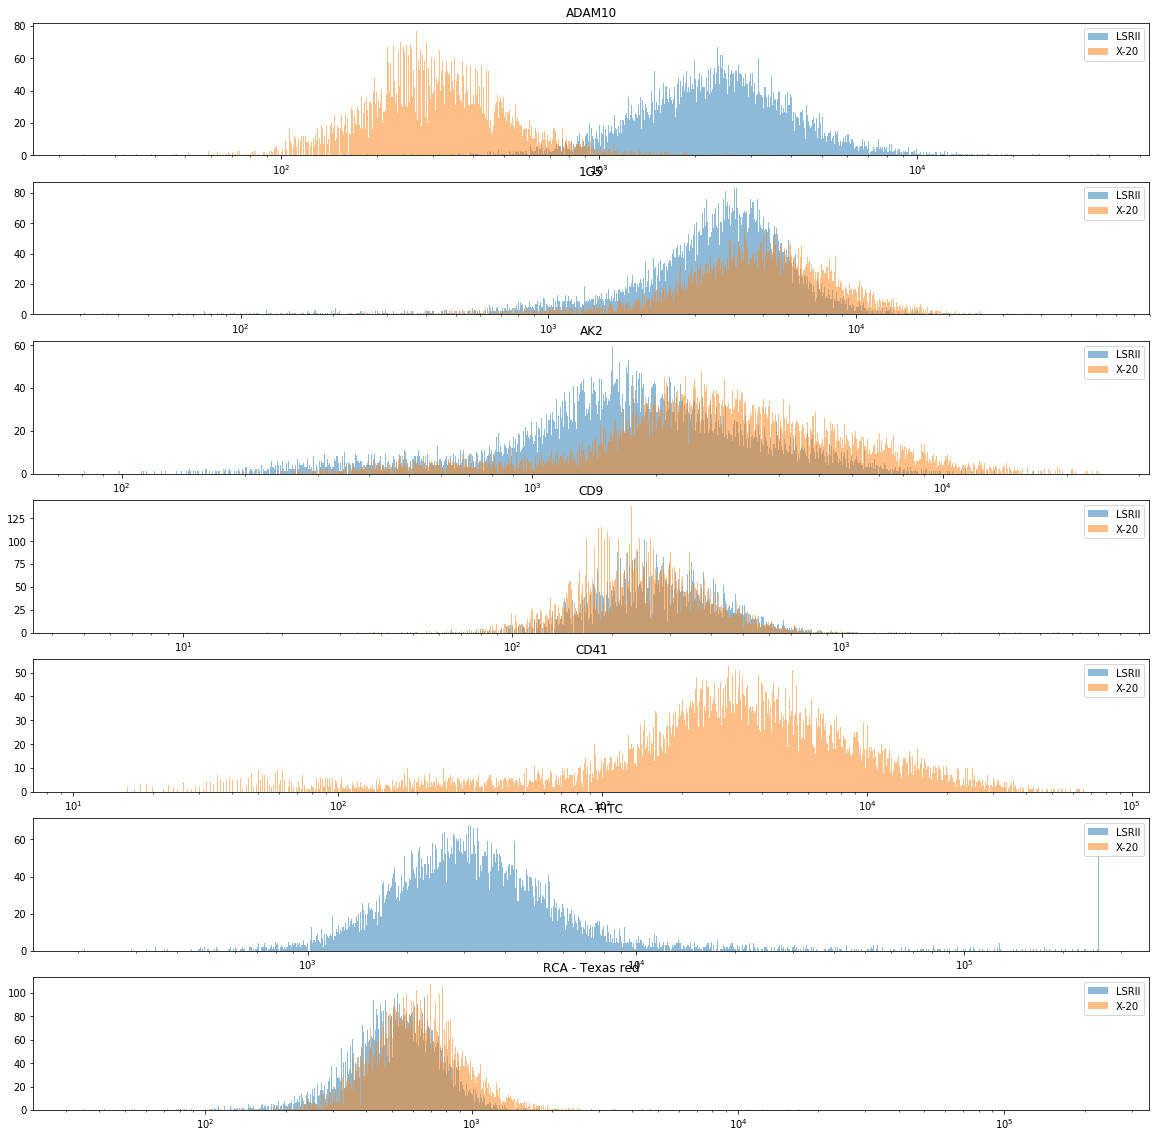

In [46]:
show_hist(two_test,measured_bands_height,surface_level_files,measured_surface_markers,True)